This notebook is just here for my convenience to test my code without having to always open a new windon

In [3]:
X_min = -0.2
X_max = R + 0.5
Y_min = -R-0.2
Y_max = 0.2

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:

li = [[1, 0], [0.5, -2], [2,0.3]]

d = dict()


for i in range(len(li[0])):
    d[i] = []

    for j in range(len(li)):
        try:
            d[i].append(li[j][i])
        except IndexError:
            d[i].append(0)

B = d[0]

try:
    G = d[1]
except KeyError:
    G = []
    for i in range(len(li)):
        G.append(0)



In [41]:
X = np.linspace(X_min, X_max, num=100)
Y = np.linspace(Y_min, Y_max, num=100)
xx, yy = np.meshgrid(X, Y)

#plt.plot(xx, yy, marker='.', color='k', linestyle='none')



x_li = []
y_li = []
mag_field = []

for x,y in zip(xx,yy):
    for xx,yy in zip(x,y):
        x_li.append(round(xx,2))
        y_li.append(round(yy,2))
        P = xx, yy
        mag_field.append(get_B(R, A, B, G, P, trims))


#mag_field = []
#for i in range(len(x_li)):
    
 #   mag_field.append(get_B(R, A, B, G, P, trims))



10000
10000


In [42]:
len(mag_field)

10000

In [122]:
import math

def get_B(R, A, B, G, P, trims):
    # Step 1: check what point it is
    x = P[0]
    y = P[1]
    beta1 = trims[0]
    beta2 = trims[1]
    left_trim_size = 0.138
    right_trim_size = 0.082
    
    # Initialize output
    Bout = 0
    
    # Update output, if needed
    for k in range(len(A)):
        m1 = math.tan(math.pi/2 - float(A[k][0]))
        m2 = math.tan(math.pi/2 - float(A[k][1]))
        
        if y < m1*x - R and y >= m2*x - R:  # if P is in Area k
            if k != len(A) - 1:  # NOT in the last area (exit area)
                d = math.sqrt(x**2 + (y-(-R))**2)
                h = R - d
                Bout = B[k]+ G[k]*h
                break
            elif k == len(A) - 1:  # in the last area (exit area)
                if y >= math.tan(-beta1)*x + (-R-math.tan(-beta1)*(R-left_trim_size)) and \
                        y >= math.tan(beta2)*x + (-R-math.tan(beta2)*(R+right_trim_size)):  # inside magnet
                    d = math.sqrt(x**2 + (y-(-R))**2)
                    h = R - d
                    Bout = B[k] + G[k]*h
                    break
    
    return Bout

#print(get_B(R, A, B, G, P, trims))

In [51]:
import pandas as pd

# Suppose df is your DataFrame
df = pd.read_csv("test - Sheet1.csv",header=None)


# Extract first column into a list
alpha = df.iloc[:, 0].tolist()

# Extract remaining columns into a list of lists
li = df.iloc[:, 1:].values.tolist()


li

[[0.6, 2.0], [0.4, -2.0], [0.5, 1.0]]

In [52]:
d = dict()

for i in range(len(li[0])):
    d[i] = []
    for j in range(len(li)):
        try:
            d[i].append(li[j][i])
        except IndexError:
            d[i].append(0)

B = d[0]

try:
    G = d[1]
except KeyError:
    G = []
    for i in range(len(li)):
        G.append(0)



In [292]:

def get_B(R, A, B, G, P, trims):
    # Step 1: check what point it is
    x = P[0]
    y = P[1]
    beta1 = trims[0]
    beta2 = trims[1]
    left_trim_size = 0.138
    right_trim_size = 0.082
    
    # Initialize output
    Bout = 0
    
    # Update output, if needed
    for k in range(len(A)):
        m1 = math.tan(math.pi/2 - float(A[k][0]))
        m2 = math.tan(math.pi/2 - float(A[k][1]))

        if y < m1*x - R and y >= m2*x - R:  # if P is in Area k
           # if k != len(A) - 1:  # NOT in the last area (exit area)
            d = math.sqrt(x**2 + (y-(-R))**2)
            h = R - d
            Bout = B[k]+ G[k]*h
            break
        # elif k == len(A) - 1:  # in the last area (exit area)
            #     if y >= math.tan(-beta1)*x + (-R-math.tan(-beta1)*(R-left_trim_size)) and \
            #             y >= math.tan(beta2)*x + (-R-math.tan(beta2)*(R+right_trim_size)):  # inside magnet
            #         d = math.sqrt(x**2 + (y-(-R))**2)
            #         h = R - d
            #         Bout = B[k] + G[k]*h
             
                   # break


    return Bout


In [320]:

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


def default():

    R = 0.7
    a = [0.39, 0.4, 0.5]
    P = [0.2, -0.5]
    trims = [0.1, math.pi/2-0.1 ]
   #li = [[0.6,0.4], [0.5, 2], [-2,1]]
    li = [[1, 0], [0.5, -2], [2,0.3]]


    X_min = -0.2
    X_max = R + 0.5
    Y_min = -R-0.2
    Y_max = 0.2


    d = dict()


    for i in range(len(li[0])):
        d[i] = []
        for j in range(len(li)):
            try:
                d[i].append(li[j][i])
            except IndexError:
                d[i].append(0)


    B = d[0]
    try:
        G = d[1]
    except KeyError:
        G = []
        for i in range(len(li)):
            G.append(0)
    
    A = []
    curr = 0
    for i in range(len(a)):
        A.append([curr, curr + float(a[i])])
        curr += float(a[i])
    

    X = np.linspace(X_min, X_max, num=100)
    Y = np.linspace(Y_min, Y_max, num=100)
    xx, yy = np.meshgrid(X, Y)


    x_li = []
    y_li = []
    mag_field = []

    for x,y in zip(xx,yy):
        for xx,yy in zip(x,y):
            x_li.append(round(xx,2))
            y_li.append(round(yy,2))
            P = xx, yy
            mag_field.append(get_B(R, A, B, G, P, trims))


    df = pd.DataFrame({
        'x': x_li,
        'y': y_li,
        'values': mag_field
    })

    pivot_table = df.pivot_table(index='y', columns='x', values='values', aggfunc=np.mean)

    fig, ax = plt.subplots(figsize=(10,7))


    plt.scatter(df['x'], df['y'])
    sns.heatmap(pivot_table, cbar_kws={'label': 'B[T]'},cmap="Reds", ax=ax)



    plt.xlabel("X position (m)") 
    plt.ylabel("Y position (m)") 


    plt.xlabel("X position (m)") 
    plt.ylabel("Y position (m)") 

    # For X axis
    n_cols = len(pivot_table.columns)
    n = 5 
    ticks = ax.get_xticks()[::n]
    ax.set_xticks(ticks)
    ax.set_xticklabels([pivot_table.columns[int(tick)] for tick in ticks])

 


  
    #a = X_min * min(len(pivot_table.columns), len(pivot_table.index))
    #b = Y_min * min(len(pivot_table.columns), len(pivot_table.index))

    a = 0 
    b = -R
    r = 0.7

    # Adjust the radius to match the DataFrame indices
    r_adj = r  #* min(len(pivot_table.columns), len(pivot_table.index))

    stepSize = 0.01

    positions = []
    t = 0
    while t < 2 * math.pi:
        positions.append((r_adj * math.cos(t) + a, r_adj * math.sin(t) + b))
        t += stepSize


    X = []
    Y = []
    for i in positions:
        x, y = i
        X.append(x)
        Y.append(-y)



    ax.plot(X, Y, color='black')

    ax.invert_yaxis()  # Reverse y-axis

    return fig





Figure(1000x700)


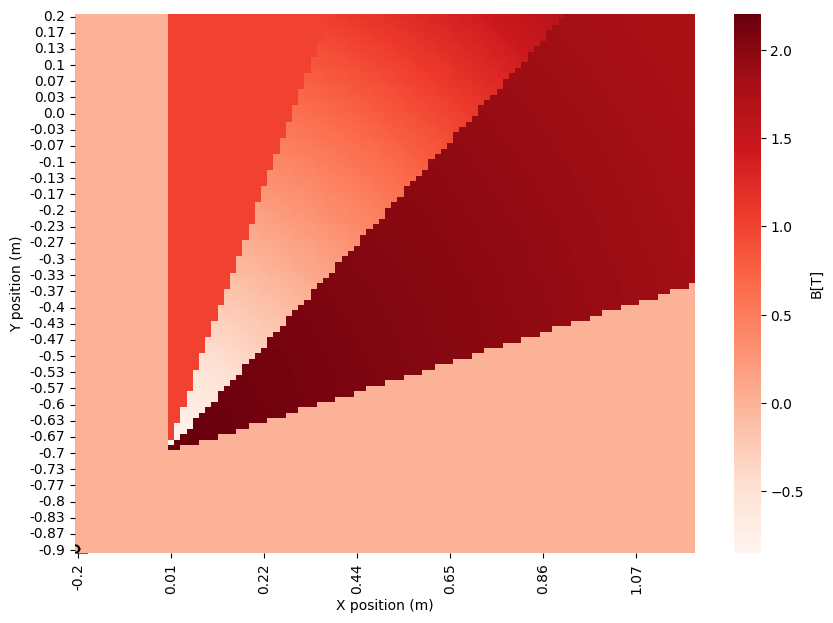

In [321]:
print(default())

In [303]:

def custom(A, li, R, X_min, X_max, Y_min, Y_max):

   
    trims = [0.1, math.pi/2-0.1 ]

    d = dict()


    for i in range(len(li[0])):
        d[i] = []
        for j in range(len(li)):
            try:
                d[i].append(li[j][i])
            except IndexError:
                d[i].append(0)


    B = d[0]
    try:
        G = d[1]
    except KeyError:
        G = []
        for i in range(len(li)):
            G.append(0)
    a = A
    A = []
    curr = 0
    for i in range(len(a)):
        A.append([curr, curr + float(a[i])])
        curr += float(a[i])
    

    X = np.linspace(X_min, X_max, num=100)
    Y = np.linspace(Y_min, Y_max, num=100)
    xx, yy = np.meshgrid(X, Y)


    x_li = []
    y_li = []
    mag_field = []

    for x,y in zip(xx,yy):
        for xx,yy in zip(x,y):
            x_li.append(round(xx,2))
            y_li.append(round(yy,2))
            P = xx, yy
            mag_field.append(get_B(R, A, B, G, P, trims))


    df = pd.DataFrame({
        'x': x_li,
        'y': y_li,
        'values': mag_field
    })

    pivot_table = df.pivot_table(index='y', columns='x', values='values', aggfunc=np.sum)

    fig, ax = plt.subplots(figsize=(10,7))
    sns.heatmap(pivot_table, cbar_kws={'label': 'B[T]'},cmap="Reds", ax=ax)

    plt.xlabel("X position (m)") 
    plt.ylabel("Y position (m)") 


    # For X axis
    n_cols = len(pivot_table.columns)
    n = 5 
    ticks = ax.get_xticks()[::n]
    ax.set_xticks(ticks)
    ax.set_xticklabels([pivot_table.columns[int(tick)] for tick in ticks])

    # For Y axis
    n_rows = len(pivot_table.index)
    n = 5  # adjust this as per your requirement
    ticks_y = ax.get_yticks()[::n]
    ax.set_yticks(ticks_y)
    ax.set_yticklabels([pivot_table.index[int(tick)] for tick in ticks_y])

   
    a = X_min 
    b = Y_min
    r = 0.7

    # Adjust the radius to match the DataFrame indices
    r_adj = r * min(len(pivot_table.columns), len(pivot_table.index))

    stepSize = 0.01

    positions = []
    t = 0
    while t < 2 * math.pi:
        positions.append((r_adj * math.cos(t) + a, r_adj * math.sin(t) + b))
        t += stepSize



    
    X = []
    Y = []
    for i in positions:
        x, y = i
        X.append(x)
        Y.append(-y)



    ax.plot(X, Y, color='black')

    ax.invert_yaxis()  # Reverse y-axis
    ax.set_aspect('equal')


   # return fig




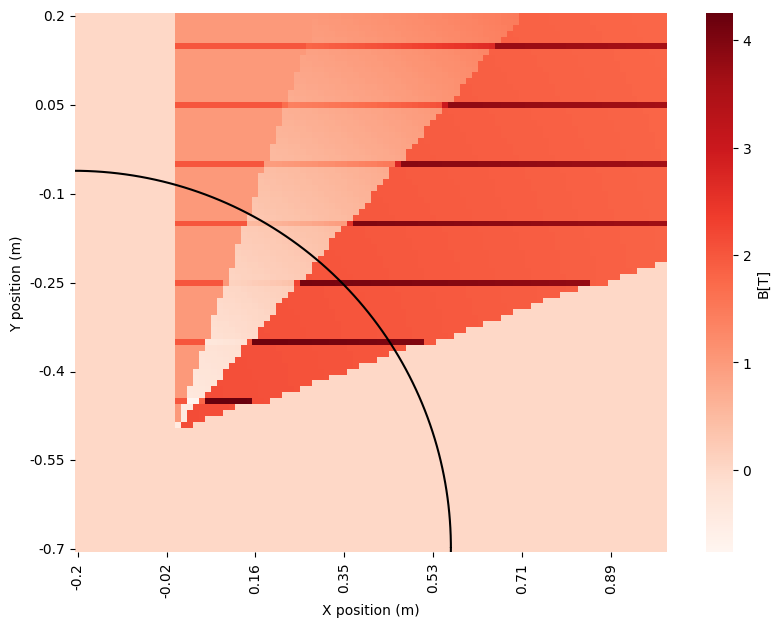

In [304]:

R = 0.5
A = [0.39, 0.4, 0.5]
P = [0.2, -0.5]
trims = [0.1, math.pi/2-0.1 ]
#li = [[0.6,0.4], [0.5, 2], [-2,1]]
li = [[1, 0], [0.5, -2], [2,0.3]]

X_min = -0.2
X_max = R + 0.5
Y_min = -R-0.2
Y_max = 0.2


custom(A, li, R, X_min, X_max, Y_min, Y_max)

[(0.5, -0.5), (0.49997500020833263, -0.4950000833329167), (0.4999000033332889, -0.49000066665333347), (0.49977501687449377, -0.4850022498987522), (0.49960005333048896, -0.4800053329066829), (0.49937513019748314, -0.4750104153646608), (0.4991002699676021, -0.4700179967602777), (0.4987755001266398, -0.4650285763312336), (0.4984008531513097, -0.46004265301541364), (0.49797636650599714, -0.45506072540099446), (0.4975020826390129, -0.45008329167658595), (0.4969780489783484, -0.4451108495814126), (0.4964043179269331, -0.4401438963555403), (0.49578094685739404, -0.43518292869015257), (0.4951079981063186, -0.43022844267788174), (0.4943855389680211, -0.4252809337632004), (0.49361364168781346, -0.420340896692877), (0.4927923834547804, -0.415408825466502), (0.4919218463940607, -0.41048521328708787), (0.49100211755863515, -0.40557055251174967), (0.4900332889206208, -0.4006653346024694), (0.48901545736207414, -0.3957700500769502), (0.48794872466530276, -0.3908851884595653), (0.4868331975026874, -0.

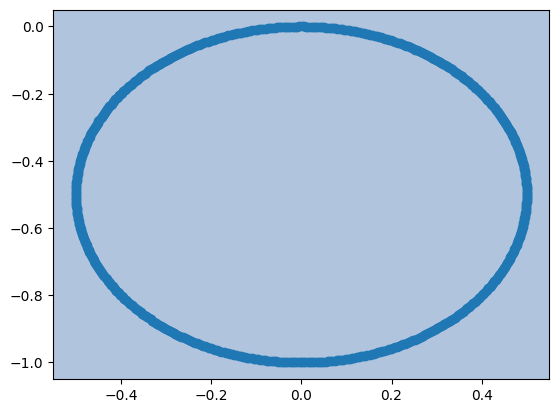

In [309]:
stepSize = 0.01
positions = []
t = 0
while t < 2 * math.pi:
    positions.append((0.5 * math.cos(t) + 0, 0.5 * math.sin(t) + (-0.5)))
    t += stepSize

print(positions)
zip(*positions)
plt.scatter(*zip(*positions))
plt.show()

In [363]:

def custom(A, li, R, X_min, X_max, Y_min, Y_max):

   
    trims = [0.1, math.pi/2-0.1 ]

    d = dict()


    for i in range(len(li[0])):
        d[i] = []
        for j in range(len(li)):
            try:
                d[i].append(li[j][i])
            except IndexError:
                d[i].append(0)


    B = d[0]
    try:
        G = d[1]
    except KeyError:
        G = []
        for i in range(len(li)):
            G.append(0)
    a = A
    A = []
    curr = 0
    for i in range(len(a)):
        A.append([curr, curr + float(a[i])])
        curr += float(a[i])
    

    X = np.linspace(X_min, X_max, num=100)
    Y = np.linspace(Y_min, Y_max, num=100)
    xx, yy = np.meshgrid(X, Y)


    x_li = []
    y_li = []
    mag_field = []

    for x,y in zip(xx,yy):
        for xx,yy in zip(x,y):
            x_li.append(round(xx,2))
            y_li.append(round(yy,2))
            P = xx, yy
            mag_field.append(get_B(R, A, B, G, P, trims))


    df = pd.DataFrame({
        'x': x_li,
        'y': y_li,
        'values': mag_field
    })
    
    plt.scatter(df['x'], df['y'],c=df['values'],cmap='Reds')

   # return fig




0.5 0.5


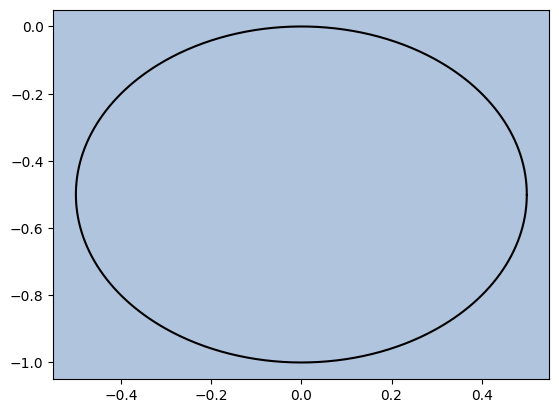

In [373]:

R = 0.5
A = [0.39, 0.4, 0.5]
P = [0.2, -0.5]
trims = [0.1, math.pi/2-0.1 ]
li = [[1, 0], [0.5, -2], [2,0.3]]


X_min = 0.1
X_max = 0.3 
Y_min = -0.2
Y_max =0.1

a = 0 
b = -R
r = 0.5
# Adjust the radius to match the DataFrame indices
r_adj = r
stepSize = 0.01

positions = []
t = 0
while t < 2 * math.pi:
    positions.append((r_adj * math.cos(t) + a, r_adj * math.sin(t) + b))
    t += stepSize




X = []
Y = []
for i in positions:
    x, y = i
    X.append(x)
    Y.append(y)

plt.plot(X, Y, color='black')

print(R, r)
custom(A, li, R, X_min, X_max, Y_min, Y_max)

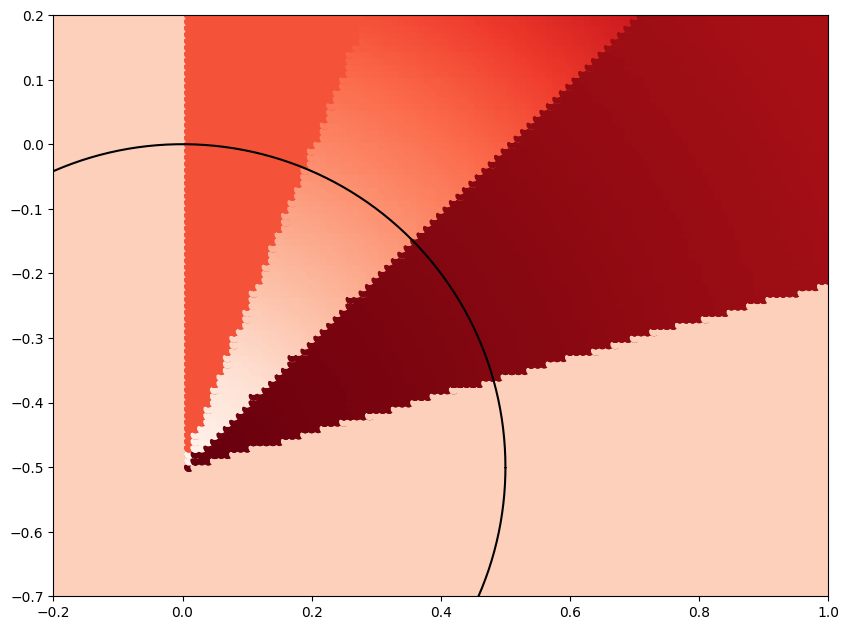

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def custom(A, li, R, X_min, X_max, Y_min, Y_max):
    trims = [0.1, math.pi/2-0.1 ]
    d = dict()
    for i in range(len(li[0])):
        d[i] = []
        for j in range(len(li)):
            try:
                d[i].append(li[j][i])
            except IndexError:
                d[i].append(0)
    B = d[0]
    try:
        G = d[1]
    except KeyError:
        G = []
        for i in range(len(li)):
            G.append(0)
    a = A
    A = []
    curr = 0
    for i in range(len(a)):
        A.append([curr, curr + float(a[i])])
        curr += float(a[i])

    X = np.linspace(X_min, X_max, num=200)
    Y = np.linspace(Y_min, Y_max, num=200)
    xx, yy = np.meshgrid(X, Y)

    x_li = []
    y_li = []
    mag_field = []

    for x,y in zip(xx,yy):
        for xx,yy in zip(x,y):
            x_li.append(round(xx,2))
            y_li.append(round(yy,2))
            P = xx, yy
            mag_field.append(get_B(R, A, B, G, P, trims))

    df = pd.DataFrame({
        'x': x_li,
        'y': y_li,
        'values': mag_field
    })

    plt.scatter(df['x'], df['y'],c=df['values'],cmap='Reds')


def main():
    R = 0.5
    A = [0.39, 0.4, 0.5]
    P = [0.2, -0.5]
    trims = [0.1, math.pi/2-0.1 ]
    li = [[1, 0], [0.5, -2], [2,0.3]]

    X_min = -0.2
    X_max = R + 0.5
    Y_min = -R-0.2
    Y_max = 0.2


    a = 0 
    b = -R
    r = 0.5
    r_adj = r
    stepSize = 0.01

    positions = []
    t = 0
    while t < 2 * math.pi:
        positions.append((r_adj * math.cos(t) + a, r_adj * math.sin(t) + b))
        t += stepSize

    X = []
    Y = []
    for i in positions:
        x, y = i
        X.append(x)
        Y.append(y)

    plt.figure(figsize=(10,10)) 
    plt.plot(X, Y, color='black')

    custom(A, li, R, X_min, X_max, Y_min, Y_max)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim([X_min, X_max])
    plt.ylim([Y_min, Y_max])

    plt.show()

if __name__ == "__main__":
    main()


In [379]:

def get_B(R, A, B, G, P):
    # Step 1: check what point it is
    x = P[0]
    y = P[1]
   # beta1 = trims[0]
   # beta2 = trims[1]
   # left_trim_size = 0.138
   # right_trim_size = 0.082
    
    # Initialize output
    Bout = 0
    
    # Update output, if needed
    for k in range(len(A)):
        m1 = math.tan(math.pi/2 - float(A[k][0]))
        m2 = math.tan(math.pi/2 - float(A[k][1]))
        
        if y < m1*x - R and y >= m2*x - R:  # if P is in Area k
            d = math.sqrt(x**2 + (y-(-R))**2)
            h = R - d

            Bout = float(B[k])+ float(G[k])*h
            break


    return Bout



In [397]:

def custom(X_min, X_max, Y_min, Y_max, A, li, R):
    a = 0 
    b = -R
    r = 0.5
    stepSize = 0.01

    positions = []
    t = 0
    while t < 2 * math.pi:
        positions.append((R*math.cos(t) + a, R*math.sin(t) + b))
        t += stepSize

    X = []
    Y = []
    for i in positions:
        x, y = i
        X.append(x)
        Y.append(y)

    fig, ax = plt.subplots(figsize=(10,10)) 
    ax.plot(X, Y, color='black')

    # helper function part starts here
    d = dict()
    for i in range(len(li[0])):
        d[i] = []
        for j in range(len(li)):
            try:
                d[i].append(li[j][i])
            except IndexError:
                d[i].append(0)
    B = d[0]
    try:
        G = d[1]
    except KeyError:
        G = []
        for i in range(len(li)):
            G.append(0)
    a = A
    A = []
    curr = 0
    for i in range(len(a)):
        A.append([curr, curr + float(a[i])])
        curr += float(a[i])

    X = np.linspace(X_min, X_max, num=150)
    Y = np.linspace(Y_min, Y_max, num=150)
    xx, yy = np.meshgrid(X, Y)


    x_li = []
    y_li = []
    mag_field = []

    for x,y in zip(xx,yy):
        for xx,yy in zip(x,y):
            x_li.append(round(xx,2))
            y_li.append(round(yy,2))
            P = xx, yy
            mag_field.append(get_B(R, A, B, G, P))

    df = pd.DataFrame({
        'x': x_li,
        'y': y_li,
        'values': mag_field
    })

    #scatter = ax.scatter(df['x'], df['y'], c=df['values'], cmap='Reds')
    scatter = ax.scatter(df['x'], df['y'], c=df['values'], cmap='Reds', s=5, alpha=0.5)

    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')

    colorbar = plt.colorbar(scatter, ax=ax)
    colorbar.set_label('Magnetic Field (T)')
    # helper function part ends here

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([X_min, X_max])
    ax.set_ylim([Y_min, Y_max])

    print(mag_field)

    
    return fig  # return only figure object


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.14884439898689295, 0.15038786056672349, 0.1519525406193576, 0.15353828674308623, 0.1551449459697597, 0.1567723648205125, 0.1584203893605628, 0.16008886525306554, 0.1617776378119936, 0.16348655205402807, 0.16521545274943872, 0.16696418447193762, 0.16873259164749155, 0.17052051860208006, 0.17232780960838745, 0.17415430893141925, 0.17599986087303665, 0.17786430981539958, 0.17974750026331776, 0.18164927688550214, 0.18356948455471944, 0.1855079683868448, 0.18746457377881798, 0.18943914644550186, 0.19143153245544886, 0.1934415782655785, 0.195

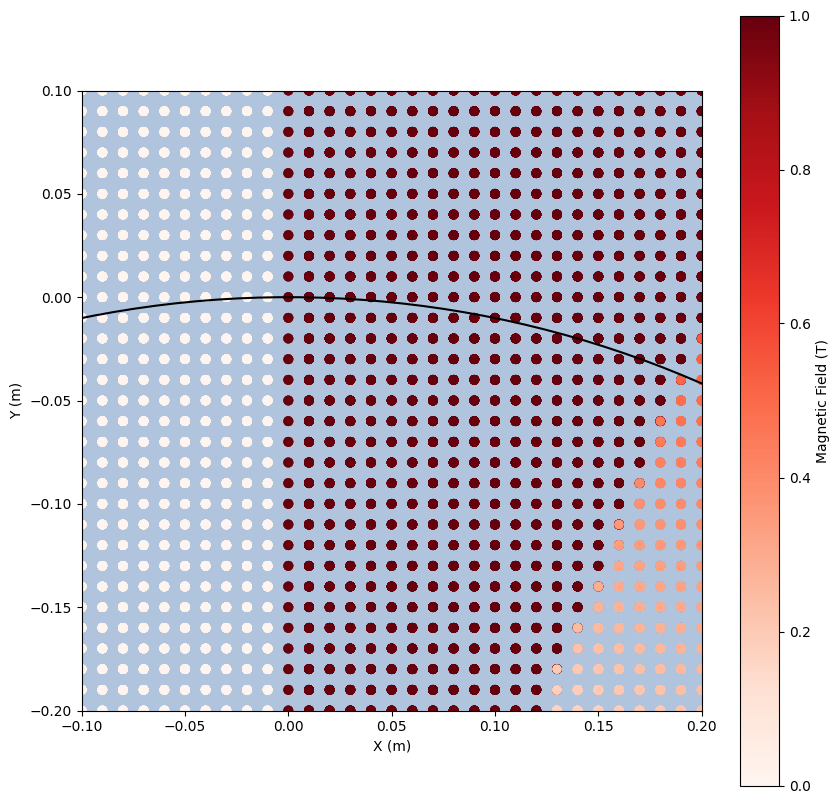

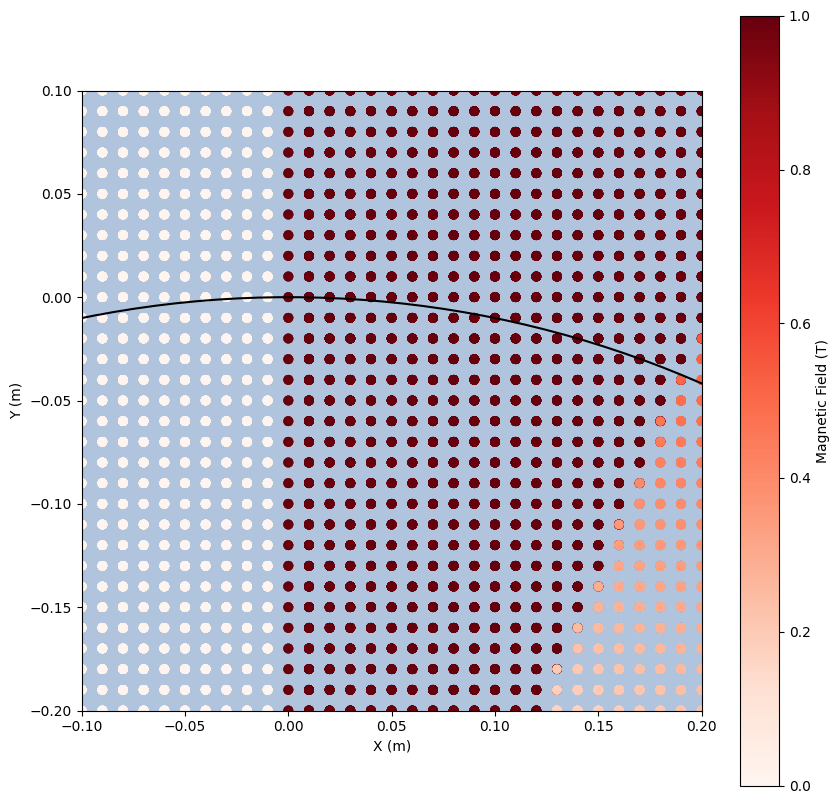

In [398]:
R = 0.5
A = [0.39, 0.4, 0.5]
P = [0.2, -0.5]
trims = [0.1, math.pi/2-0.1 ]
li = [[1, 0], [0.5, -2], [2,0.3]]

X_min = -0.1
X_max = 0.2
Y_min = -0.2
Y_max = 0.1

custom(X_min, X_max, Y_min, Y_max, A, li, R)